In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import requests #Get the HTML code
from bs4 import BeautifulSoup #Tidy up the code
from collections import Counter #Counter to count occurances of each word
import matplotlib.pyplot as plt #graph plotting
import re #regular expression to check if language setting is exactly 2 letters (for non common langs) in the argument
import os #for plotwords to tell where file is saved
import math #for calculating font size of graphs using exponential

#var = wikiscrape.wiki('Article Search',optional arguments 2-4)
#Arg 1 is article name in string, Arg 2 is to format in proper case (default Yes), Arg 3 is language (default EN), Arg 4 is use stoplist of NLTK (default No)
class wiki:

    #The main features of cleaning the wiki site and whether the site is valid is run in __init__
    def __init__(self,title,option='Yes',lang='en',checknltk='No',lemmatize='No'):
        """The wiki() class accepts 5 arguments. The first one is a compulsory title of the Wikipedia page. 
        Second is to format the search string to proper/title case (Yes/No, default: Yes).
        Third is for language settings (e.g. English, de, francais, etc., default: English). 
        Fourth is for implementing NLTK stoplist in provided languages (Yes/No, default: No, with standard stoplist)
        By default, a standard stoplist of the most common words in the English language and Wikipedia common words is provided.
        Fifth is for lemmatizing text before using text analytics functions (Yes/No, default: No).
        """
        print("Page is loading...\n")
        self.graphtitle = title #for graph title labelling
        if isinstance(title, str) == True:
            if str(option).lower() == 'yes' or str(option) == '':
                self.title = str(title.title()) 
                print("Search text formatted to title/proper case by default. Set second argument as 'No' to disable formatting")
            elif str(option).lower() == 'no':
                print("Search text has preserved the cases of each letter. Set second argument as 'Yes' to format to title/proper case")
                self.title = title
            else:
                self.title = title.title() 
                print('Invalid option for preserving case of search text, title/proper case will be used by default')
            self.title = str(self.title.replace(" ", "_")) #Convert spaces to _ as is Wikipedia page format
        else:
            print('Error encountered, search text (first argument) is not written as a string with quotes. Please try again')
        
        
        #Checking if you should use NLTK library for stoplist, default set to False
        self.nltkrun = False 
        if isinstance(checknltk, str): #check for string yes, no and other permutations
            if checknltk.lower().strip() in {'yes','true','y','t'}:
                import nltk
                nltk.download('stopwords')
                nltk.download('wordnet')
                from nltk.corpus import stopwords
                from nltk.corpus import wordnet
                self.nltkrun = True
            elif checknltk.lower().strip() in {'no','false','n','f','na','n/a','nan'}:
                self.nltkrun = False
            else:
                self.nltkrun = False
        elif isinstance(checknltk, bool): #check for boolean yes/no
            if checknltk == True:
                import nltk
                nltk.download('stopwords')
                nltk.download('wordnet')
                from nltk.corpus import stopwords
                from nltk.corpus import wordnet
                self.nltkrun = True
            else:
                self.nltkrun = False
        else: #run default if options are invalid - don't run nltk stoplist
            self.nltkrun = False
            
        # Check if NLTK Lemmatized is turned on
        self.to_lemmatize = False
        if isinstance(lemmatize, str):
            if lemmatize.lower().strip() in {'yes','true','y','t'}:
                from nltk.stem import WordNetLemmatizer
                self.lemmatizer = WordNetLemmatizer()
                self.to_lemmatize = True
            elif lemmatize.lower().strip() in {'no','false','n','f','na','n/a','nan'}:
                self.to_lemmatize = False
            else:
                self.to_lemmatize = False

        #Default: Stopword list obtained from nltk
        self.nltkstopword = []
        
        #Detect language settings in third argument
        self.lang = 'en'  
        if isinstance(lang, str) == True:
            if lang.lower().lstrip() in {'en','england','uk','u.k.','english','eng'}:
                self.lang = 'en'
                if self.nltkrun == True:
                    self.nltkstopword = stopwords.words('english') 
                    print('NLTK Stopword list for English will be used to remove common words\n')
            elif lang.lower().lstrip() in {'de','germany','german','deutschland','deutsche','deutsch'}:
                self.lang = 'de'
                if self.nltkrun == True:
                    self.nltkstopword = stopwords.words('german')
                    print('NLTK Stopword list for German will be used to remove common words\n')
            elif lang.lower().lstrip() in {'ru','russian','russia','русский','российский','русская','россия'}:
                self.lang = 'ru'
                if self.nltkrun == True:
                    self.nltkstopword = stopwords.words('russian')
                    print('NLTK Stopword list for Russian will be used to remove common words\n')
            elif lang.lower().lstrip() in {'it','italy','italian','italia','italiano'}:
                self.lang = 'it'
                if self.nltkrun == True:
                    self.nltkstopword = stopwords.words('italian')
                    print('NLTK Stopword list for Italian will be used to remove common words\n')
            elif lang.lower().lstrip() in {'pt','por','portugal','portuguese','portogallo','portoghese','brazil','brasile','brasiliano','brazilian'}:
                self.lang = 'pt'
                if self.nltkrun == True:
                    self.nltkstopword = stopwords.words('portuguese')
                    print('NLTK Stopword list for Portuguese will be used to remove common words\n')
            elif lang.lower().lstrip() in {'ja','japan','japanese','jp','日本','ジャパン','日本語','にほん','にほんご'}:
                self.lang = 'ja'
            elif lang.lower().lstrip() in {'es','sp','spain','spanish','españa','espana','español','español','castellano','hispano'}:
                self.lang = 'es'
                if self.nltkrun == True:
                    self.nltkstopword = stopwords.words('spanish')
                    print('NLTK Stopword list for Spanish will be used to remove common words\n')
            elif lang.lower().lstrip() in {'fr','france','french','français','francais'}:
                self.lang = 'fr'
                if self.nltkrun == True:
                    self.nltkstopword = stopwords.words('french')
                    print('NLTK Stopword list for French will be used to remove common words\n')
            elif lang.lower().lstrip() in {'zh','cn','china','chinese','中文','华文','華文','汉语','漢語','中国','中國','漢語','华语','華語'}:
                self.lang = 'zh'
            elif lang.lower().lstrip() in {'pl','po','polish','poland','polska','polskie','polski'}:
                self.lang = 'pl'
            elif lang.lower().lstrip() in {'nl','netherlands','dutch','the netherlands','nederland','nederlands','holland','hollands'}:
                self.lang = 'nl'
                if self.nltkrun == True:
                    self.nltkstopword = stopwords.words('dutch')
                    print('NLTK Stopword list for Dutch will be used to remove common words\n')
            elif lang.lower().lstrip() in {'sv','sw','sweden','swedish','sverige','svenska','svensk'}:
                self.lang = 'sv'
                if self.nltkrun == True:
                    self.nltkstopword = stopwords.words('swedish')
                    print('NLTK Stopword list for Swedish will be used to remove common words\n')
            elif lang.lower().lstrip() in {'vi','vietnam','vn','vietnamese','việt nam','việtnam','tiếng việt','tiếng Việt'}:
                self.lang = 'vi'
            elif re.search(r"[a-z]{2}", lang, re.I) != None: #search for two letter character as lang set, not case sensitive re.I
            #elif len((lang.lower()).lstrip()) == 2:
                self.lang = lang
                print('Language set to ' + "'" + lang + "'")
            else:
                self.lang = 'en'
                print('Invalid language settings, English articles searched by default\n')
                
        else:
            self.lang = 'en'
            print('Invalid language settings or not in string format, hence English articles used by default\n')
        
        #Get URL of Wikipedia Article
        self.url = 'https://' + self.lang + '.wikipedia.org/wiki/' + self.title #combine the two to get full URL

        try: 
            self.page = requests.get(self.url) #retrieve HTML info from site
        except:
            self.lang = 'en'
            self.url = 'https://' + self.lang + '.wikipedia.org/wiki/' + self.title
            self.page = requests.get(self.url)
            print('Error with language settings, English used as default\n')

        self.contents = self.page.content 
        #Parse the HTML nicely with formatting
        self.soup = BeautifulSoup(self.contents, 'html.parser') 
        
        self.wordcorpus = self.soup.find_all('p') #obtain all paragraphs starting with tag <p>
        self.wordcorpus2 = self.soup.find_all('li') #obtain all paragraphs starting with tag <li>

        #Get paragraphs from wordcorpus with special format into a list
        self.para=[]
        for paragraph in self.wordcorpus: #append paragraphs starting with <p>
            self.para.append(paragraph)

        self.relatedtopic = ",*RELATED WIKI TOPIC*" #Identify topics in Wikipedia with an URL to point out to user
        for paragraph in self.wordcorpus2: #append paragraphs starting with <li>
            if str(paragraph).find('<li><a href=') != -1:
                if str(paragraph).find('</a></li>') != -1 or str(paragraph).find('</a></sup></li>') != -1: 
                    self.para.append(self.relatedtopic)
            if str(paragraph).find('toctext') == -1: #remove Wiki headers 1.2.3 with toctext as they can't be arranged properly
                self.para.append(paragraph)
    
        #REASON WHY WE HAVE TO DO TWO FOR LOOPS WITH TWO wordcorpus IS BECAUSE THE FIND_ALL FOR ARRAY IS NOT IN ORDER
        #COMMENCE CLEANING OF UNWANTED HTML <> and WIKI LINK [no]
        
        #For FIXING the summary function
        self.troubleshoot = self.para
        
        #DATA CLEANING OF UNWANTED HTML <> and []
        self.para = list(str(self.para)) #chop everything into letters for cleaning
        
        #This block of code removes the first letter [, removes any words with <> html tag or [] citation
        #When it detects a <li> it will create two blanks
        self.start = 0 #is letter currently inside tag <>
        self.end = 0 #has <> just ended, need to check for , if it just ended to not copy a comma after <>
        self.first = 1 #first letter is [, need to omit
        self.bracket = 0 #check if letter is inside bracket
        self.li = 0 #check for <li> to line break
        self.p = 0 #check for <p> to line break
        self.point = 0 #after <li> or list, puts a • before adding new letter
        self.para2 = []
        for letter in self.para:
            if self.first == 0:
                if letter == '<': #tells python to stop reading letters inside a bracket
                    self.start = 1
                elif letter == '>': #next letter can be read since its out of bracket, unless its another <
                    self.start = 0
                    self.end = 1
                elif self.end == 1 and letter == ',': #skip COMMA reading when it occurs like </p>, at end of para
                    self.end = 0
                    continue
                elif letter == '[':
                    self.bracket = 1
                    self.end = 0
                elif letter == ']':
                    self.bracket = 0
                    self.end = 0
                elif self.start == 0 and self.bracket == 0: #ALL CLEAR TO READ LETTER
                    self.end = 0
                    if self.point == 1:
                        self.para2.append('• ')
                        self.point = 0
                    self.para2.append(letter)
            if letter == '<':
                self.li = 1
            elif letter != 'l' and self.li == 1:
                self.li = 0
            elif letter == 'l' and self.li == 1:
                self.li = 2
            elif letter == 'i' and self.li == 2:
                self.li = 3
            elif letter != '>' and self.li == 3:
                self.li = 0
            elif letter == '>' and self.li == 3:
                self.para2.append('\n\n')
                self.li = 0
                self.point = 1
            if letter == '<':
                self.p = 1
            elif letter != 'p' and self.p == 1:
                self.p = 0
            elif letter == 'p' and self.p == 1:
                self.p = 2
            elif letter == '>' and self.p == 2:
                self.para2.append('\n')
                self.p = 0
            self.first = 0 #Had an issue with the first letter being [, after skipping this, the [number] checks can run

        self.para2 =''.join(self.para2) #combine back all letters and spaces
        
        #REMOVE UNWANTED ARRAYS
        self.para = []
        
        #WORD COUNT (SELF.PARA3) AND COMMON WORDS (SELF.WORDCOUNTER)
        
        self.para3 = self.para2.split() #split paragraphs into words again for counting
        self.niceword = ''
        self.punctuation = ('.',',','(',')','"',"'",'?','!','*','|',':',';') 
        
        if self.to_lemmatize == True:
            for index, word in enumerate(self.para3):
                self.niceword = word
                self.niceword = self.niceword.lower() #standardize all to lower case before counting
                for punctuation in self.punctuation:
                    self.niceword = self.niceword.replace(punctuation,'') #clean up bad punctuation
                # Lemmatize word if configured in wiki object
                self.niceword = self.lemmatizer.lemmatize(self.niceword)
                self.para3[index] = self.niceword
        else:
            for index, word in enumerate(self.para3):
                self.niceword = word
                self.niceword = self.niceword.lower() #standardize all to lower case before counting
                for punctuation in self.punctuation:
                    self.niceword = self.niceword.replace(punctuation,'') #clean up bad punctuation
                self.para3[index] = self.niceword
        
        
        self.wordcounter = Counter(self.para3) 
        #Counter solely used for word count, will use banlist to remove words from it later. 
        #Make new wordcounter2 + banlist for use
        self.allowedwords = dict(self.wordcounter.most_common()) 
        #convert to dictionary so that for loop can extract words + do unique word count + total word count
        

        #FIND OUT UNIQUE WORD COUNT AND TOTAL WORD COUNT BEFORE BANLIST - SELF.FULLWORDS AND SELF.FULLCOUNT
        self.fullcount = 0
        self.fullwords = 0
        for key in self.allowedwords:
            self.fullcount += self.allowedwords[key]
            self.fullwords += 1
        
        #IMPLEMENT BAN LIST (FROM WIKIPEDIA) BY DEL FUNCTION FOR COUNTER SELF.WORDCOUNTER AND WORD LIST SELF.ALLOWEDWORDS
        banlist = ('the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'I', 'it', 'for', 'not', 'on', 'with', 
                   'he', 'as', 'you', 'do', 'at', 'this', 'but', 'his', 'by', 'from', 'they', 'we', 'say', 'her', 'she', 
                   'or', 'an', 'will', 'my', 'one', 'all', 'would', 'there', 'their', 'what', 'so', 'up', 'out', 'if', 
                   'about', 'who', 'get', 'which', 'go', 'me', 'when', 'make', 'can', 'like', 'time', 'no', 'just', 
                   'him', 'know', 'take', 'people', 'into', 'year', 'your', 'good', 'some', 'could', 'them', 'see', 
                   'other', 'than', 'then', 'now', 'look', 'only', 'come', 'its', 'over', 'think', 'also', 'back', 
                   'after', 'use', 'two', 'how', 'our', 'work', 'first', 'well', 'way', 'even', 'new', 'want','topic', 
                   'because', 'any', 'these', 'give', 'day', 'most', 'us','retrieved','^','archived',"•",'related',
                   "',*related","wiki","topic*',","is","are",'was','since','such','articles','has','&amp;','p','b',
                  'january','february','march','april','may','june','july','august','september','october','november',
                  'december','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
                  '21','22','23','24','25','26','27','28','29','30','31','i','wa')
        
        #English banlist from top 100 common words and some extra terms
        if self.lang == 'en':
            for word in banlist: #delete words in counter and list only if it's in english
                del self.wordcounter[word]
                self.allowedwords.pop(word, None)
            
        #If NLTK stoplist is used, delete words from their stoplist as well
        if self.nltkrun == True:
            for word in self.nltkstopword: #delete words in counter and list
                del self.wordcounter[word]
                self.allowedwords.pop(word, None)
            
        #DELETE '',.,·,•,↑,space,null,related,wiki,common from counter and dictionary
        banlist2 = ("''",".","·","•","↑"," ","","-","–","/","related","wiki","common")
        for char in banlist2:
            del self.wordcounter[char]
            self.allowedwords.pop(char, None)
        
        #FIND OUT TOTAL WORD COUNT AFTER BANLIST FOR FUNCTION COMMONWORDPCT THAT USES PERCENTAGE OF THRESHOLD FOR WORD COUNT
        #SELF.FULLCOUNT2 IS TOTAL WORDS AFTER BANLIST AND FULLWORDS2 IS UNIQUE WORD COUNT AFTER BANLIST
        self.fullcount2 = 0
        self.fullwords2 = 0
        
        # SELF.ALLOWEDWORDS contain all the words and frequency after banlist, used for functions listed below
        for key in self.allowedwords: #self.allowedwords HAVE WORDS REMOVED ON ITSELF VIA BANLIST, DONT NEED NEW VARIABLE
            self.fullcount2 += self.allowedwords[key] #FULLCOUNT2 used for COMMONWORDPCT and TOTAL WORDS function to show total word count aft removing banlist
            self.fullwords2 += 1 #FULLWORDS2 used in TOTAL WORDS function to show unique word count aft removing banlist
        
    
        #This section checks if the Wiki site was loaded successfully..
        self.missing = self.soup.find_all('b') 
        #Wikipedia does not have an article with this exact name.
        #This sentence that always appears for Error 404 pages, is bolded, so <b> tag can help to find it
                
        #Check for sentence that tells of Error 404 website using a counter.
        self.goodsite = 1
        self.offsite = 0
        
        #Check if a site goes through but it is an ambiguous site (recommendations page)
        for sentence in self.wordcorpus: 
            #refer to: phrase belongs in a <p> paragraph
            if str(sentence).find("refer to:") != -1:
                self.offsite = 1            
        
        #Check if Wikipedia article exists
        for sentence in self.missing: 
            if str(sentence) == "<b>Wikipedia does not have an article with this exact name.</b>": #CONVERT ELEMENT TO STRING TYPE BEFORE CHECK!!!
                self.goodsite = 0 #sentence exists, bad site means counter flips to 0
        
        #Confirmation for successful Wikipedia site load
        if self.goodsite == 1 and self.offsite == 0:
            print('Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.')
        
            #WHEN SEARCH IS SUCCESSFUL, PRINT 2 PARAGRAPHS FOR PREVIEW
            self.parashort = []
            self.noofpara = 0
            for paragraph in self.wordcorpus: #append ONLY 2 paragraphs starting with <p>
                if self.noofpara < 2 and str(paragraph) != '<p class="mw-empty-elt">\n</p>' and len(str(paragraph)) > 199: 
                    self.parashort.append(paragraph)
                    self.noofpara += 1

            #Data cleaning for printing out summary of Wikipedia (2 paragraphs) if search is successful - cleantext_summary
            self.parashort2 = self.cleantext_summary(self.parashort)
            
            #REMOVE UNWANTED ARRAYS
            self.parashort = []        

            #END OF DATA PROCESSING FOR AUTOMATIC SUMMARY PRINTED WHEN SEARCHING

            #Print two paragraphs when search is successful
            print(self.parashort2)
            
            
        #Ambiguous search detecton and suggested article names
        elif self.goodsite == 1 and self.offsite == 1:
            print('\nThe title "'+ self.title.replace("_", " ") + '" you specified is ambiguous. As a result, you are linked to a clarification page.\n\n')
            print('Here are some suggestions to use: \n')
            
            self.all_links = self.soup.find_all("a") #ALL HTML TAGS STARTING WITH <A, E.G. <A HREF, <A TITLE AND FULL PARAGRAPH
            self.wiktwords = []
            for link in self.all_links:
                self.wiktwords.append(link.get("title")) #TAG STARTING WITH A, CONTENT ENCLOSED INSIDE TITLE=""
                #print(link.get("title")) #shows list of items appended, common words all start with wikt:

            self.cleanlink = []
            for words in self.wiktwords: 
                self.words2 = str(words) #words are not string yet so need str function before saving into new var
                self.cleanlink.append(self.words2)

            for link in self.cleanlink:
                if link.find("Help:") != -1:
                    break
                elif link.find("Edit section:") != -1:
                    continue
                else:
                    print(link)
            
        else:
            #Unable to fnd Wikipedia Page
            print('Wikipedia page could not be found for "' + str(self.title.replace("_", " ")) + '". Please try again!') 
            print('Other useful information: Enclose title argument with single quotes. Spaces are allowed, and title is case insensitive.')
        
        
    def cleantext_summary(self, corpus):
        '''Gets summary of the text, internal method'''
        #Data cleaning for printing out summary of Wikipedia (2 paragraphs) if search is successful
        corpus = list(str(corpus)) #chop everything into letters for usage
        start = 0 
        end = 0 
        first = 1 
        bracket = 0 
        li = 0 
        p = 0 
        corpus2 = []
        for letter in corpus:
            if first == 0:
                if letter == '<': #tells python to stop reading letters inside a bracket
                    start = 1
                elif letter == '>': #next letter can be read since its out of bracket, unless its another <
                    start = 0
                    end = 1
                elif end == 1 and letter == ',': #skip COMMA reading when it occurs like </p>, at end of para
                    end = 0
                    continue
                elif letter == '[':
                    bracket = 1
                    end = 0
                elif letter == ']':
                    bracket = 0
                    end = 0
                elif start == 0 and bracket == 0: #ALL CLEAR TO READ LETTER
                    end = 0
                    corpus2.append(letter)
            if letter == '<':
                p = 1
            elif letter != 'p' and p == 1:
                p = 0
            elif letter == 'p' and p == 1:
                p = 2
            elif letter == '>' and p == 2:
                corpus2.append('\n\n')
                p = 0
            first = 0 #Had an issue with the first letter being [, after skipping this, the [number] checks can run

        corpus2 = ''.join(corpus2) #combine back all letters and spaces
        return corpus2
    
    #Retrieves full text of Wikipedia Article, 'Yes' for 2nd argument to output/return it instead of print
    def gettext(self,outfull='No'): #comes after init
        '''gettext accepts 1 optional argument - Yes to output string and No to print text (default: No). It retrieves the full text of the Wikipedia title.'''
        if isinstance(outfull, str): #check for string yes, no and other permutations
            if outfull.lower().strip() in {'yes','true','y','t'}:
                print("Full text is output. To print it instead, put 'no' in argument")
                return self.para2
            elif outfull.lower().strip() in {'no','false','n','f','na','n/a','nan'}:
                print("Full text is printed. To set as output, put 'yes' in argument")
                print(self.para2)
            else:
                print("Full text is invalid, summary is printed by default. To set as output, put 'yes' in argument")
                print(self.para2)
        elif isinstance(outfull, bool): #check for boolean yes/no
            if outfull == True:
                print("Full text is output. To print it instead, put False or 'no' in argument")
                return self.para2
            else:
                print("Full text is printed. To set as output, put True or 'yes' in argument")
                print(self.para2)   
        else: #run default - print if invalid option
            print("2nd argument not a string, full text is printed by default. To set as output, put 'yes' in argument")
            print(self.para2)

    #Show frequency count of most common words, able to select number of words to output
    def commonwords(self,wordcount=100):
        '''commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site and their frequencies to show.'''
        self.wordcount = 100
        if wordcount != 100 and isinstance(wordcount, int) == True:
            self.wordcount = wordcount
        elif wordcount != 100 and isinstance(wordcount, int) == False:
            print('Word count specified is currently not an integer. Hence default of 100 words is used\n')
        #convert counter to list to dictionary then sum up total word count using for loop in word[key]
        self.topwords = dict(self.wordcounter.most_common(self.wordcount))
        return self.topwords
        
    #Show frequency count of most common words based on percentage of word count in the article
    #e.g. 10% of 10,000 words is 1,000 words, the N most common words with total frequency =< 1000 will be retrieved
    def commonwordspct(self,percent=10):
        '''commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most frequent words to show.'''
        self.percent = 10
        if isinstance(percent, int) == True or isinstance(percent, float) == True:
            if percent != 10 and 0 < percent <= 100:
                self.percent = percent
        else:
            print('The percent specified is either not an integer or float, 0% or over 100% which is not allowed. Hence, 10% set by default.\n')
        
        self.wordcount2 = int(self.percent/100*self.fullcount2) #full count 2 is word count after banlist
        print(str(self.percent) + "% threshold means the most common words shown/output below appeared equal to or less than " + str(self.wordcount2) + ' times out of ' + str(self.fullcount2) + " total word count.\n")
        self.partialcount = 0
        self.partialwordlist = []
        for key in self.wordcounter:
            self.partialcount += self.wordcounter[key]
            if self.partialcount <= self.wordcount2:
                self.partialwordlist.append(key)
            else:
                break
        self.partialcounttowordno = 0
        for word in self.partialwordlist:
            self.partialcounttowordno += 1
        self.topwords2 = dict(self.wordcounter.most_common(self.partialcounttowordno))
        if self.partialcounttowordno != 0:
            print('For the word count threshold, the ' + str(self.partialcounttowordno) + ' most common words are shown/output.\n\n')
            return self.topwords2
        else:
            print('The most common word has a percentage occurance higher than the threshold set as the percentage set is too low.\n')
    
    #Determine total word count and unique word count after banlist/word stoplist
    def totalwords(self): #word count are all BEFORE banlist
        '''totalwords accepts 0 argument and shows the total word count and unique word count'''
        print('Total word count is ' + str(self.fullcount))
        print('Total word count is ' + str(self.fullcount2) + ' after implementing banlist\n')
        print('Unique word count is ' + str(self.fullwords) + ' for the Wikipedia site titled ' + str(self.title.replace("_", " ")))
        print('Unique word count AFTER BANLIST is ' + str(self.fullwords2) + ' for the Wikipedia site titled ' + str(self.title.replace("_", " ")))
        return [self.fullcount,self.fullcount2,self.fullwords,self.fullwords2]
    
    #Plot the most common words, 2nd argument allows you to choose number of words to plot, and 3rd arg is the Nth most common word to start plotting from
    def plotwords(self,graphname='wordcount',wordcount2=20,startword=1):
        '''plotwords accepts 3 optional arguments. 
        The first argument is the filename to save as (default: wordcount.png).
        The second argument (default: 20) is for the number of most frequent words to show as a GRAPH. 
        The third argument is the Nth most frequent word to start plotting from. (default: 1, starting from most frequent word).'''
        if isinstance(wordcount2, int) == True and isinstance(startword, int) == True:
            if startword < 1 or wordcount2 < 1:
                self.notify = 2 #Error as out of range, use default
                self.wordcount2 = 20
                self.startword = 1
            else:
                self.wordcount2 = wordcount2
                self.startword = startword
                self.notify = 0
        else:
            self.notify = 1 #Error as not integer input, use default
            self.wordcount2 = 20
            self.startword = 1
            
        # Change file name
        if isinstance(graphname, str) == True:
            self.graphname = graphname + '.png'
        else:
            self.graphname = 'wordcount.png'

        #convert counter to list to dictionary then sum up total word count using for loop in word[key]
        #if start position is not modified (start from most common word, use default dict)
        #otherwise, have to make a new dictionary for plotting graph by getting start th to start + wordcount th words
        
        self.yearban = ['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','0000'] 
        # Banlist, omit these years in graph
        self.topwords2 = {}
        self.wordno_graph = 0
        for i, (word, freq) in enumerate(dict(self.wordcounter.most_common()).items()):
            # Since index i starts first word with i=0 and startword min is 1, need to check i+1 with startword min
            if i+1 >= self.startword and self.wordno_graph < self.wordcount2 and word not in self.yearban:
                #Add to dictionary if its between x - x+i words in the dictionary and not a year
                self.topwords2[word] = freq
                self.wordno_graph += 1
            elif self.wordno_graph == self.wordcount2:
                break
                #stop loop once required words are retrieved
              
                    
        #matplotlib.pyplot.bar(range, height, tick_label)
        self.wordnames = list(self.topwords2.keys())
        self.wordvalues = list(self.topwords2.values())
        self.wordnames.reverse()
        self.wordvalues.reverse()

        #tick_label does the some work as plt.xticks()
        plt.figure(figsize=(22, 18), dpi= 80, facecolor='w', edgecolor='k')
        plt.rc('ytick', labelsize=math.ceil(30*math.exp(-self.wordno_graph*0.05))+7) 
        plt.rc('xtick', labelsize=20) 
        plt.style.use('ggplot')
        self.localgraph = plt.barh(range(len(self.topwords2)),self.wordvalues,tick_label=self.wordnames)
        plt.title('Word Frequency of Wiki Article: ' + self.graphtitle + ' for the Top ' + str(self.wordno_graph) + ' words, starting from word number ' + str(self.startword),fontsize=18)
        
        #Colored bar graphs divided by green (most frequent words), orange (moderate), red (not as frequent)
        for i in range(self.wordno_graph):
            if i <= float(self.wordno_graph)/3:
                self.localgraph[i].set_color('red')
            elif i <= float(2*self.wordno_graph)/3:
                self.localgraph[i].set_color('orange')
            else:
                self.localgraph[i].set_color('green')
        
        plt.savefig(self.graphname)
        plt.rcParams['figure.figsize'] = [22, 18]
        plt.show()
        
        
        if self.notify == 1:
            print('Word count or start position specified is currently not an integer. Hence default of 20 words starting from 1st word is used for graph\n')
        elif self.notify == 2:
            print('Word count or start position specified must be 1 or greater. Default of 20 words starting from 1st word is used for graph\n')
            
        self.cwd = os.getcwd()
        print('Graph is saved as ' + self.graphname + ' in directory: ' + str(self.cwd))
    


    #Plot the most commonly cited Years in the article for time analytics, able to change number of Years to show
    def plotyear(self,graphname='yearcount',yearcount3=20):
        '''plotyear accepts 2 optional arguments. The first argument is the filename to save as (default: yearcount.png).
        The second argument (default: 20) is the number of years to plot in the graph. 
        The frequency count of the most common years will be plotted. 
        This allows the user to understand the years of interest for the Wikipedia Topic.'''
        if isinstance(yearcount3, int) == True:
            if yearcount3 < 1:
                self.notify = 2 #Error as out of range, use default
                self.yearcount3 = 20
            else:
                self.yearcount3 = yearcount3
                self.notify = 0 #OK
        else:
            self.notify = 1 #Error as not integer input, use default
            self.yearcount3 = 20

        # Change file name
        if isinstance(graphname, str) == True:
            self.graphname = graphname + '.png'
        else:
            self.graphname = 'yearcount.png'
            
        self.tempfulllist = dict(self.wordcounter.most_common())
        self.yearlist = {}
        self.actualyearcount = 0 #counter for number of years              
        
        for year in self.tempfulllist:
            if re.search(r"\b\d{4}\b", year) != None and year.find('-') == -1 and year.find('–') == -1 and year[0:2] != '00':
                try:
                    self.yearlist[year] = self.tempfulllist[year]
                    self.actualyearcount += 1
                    if self.actualyearcount == self.yearcount3:
                        break
                except:
                    continue  
        
        #matplotlib.pyplot.bar(range, height, tick_label)
        self.yearnames = list(self.yearlist.keys())
        self.yearvalues = list(self.yearlist.values())
        self.yearnames.reverse()
        self.yearvalues.reverse()

        #tick_label does the some work as plt.xticks()
        plt.figure(figsize=(22, 18), dpi= 80, facecolor='w', edgecolor='k')
        plt.rc('ytick', labelsize=math.ceil(53*math.exp(-self.actualyearcount*0.06))+7) 
        plt.rc('xtick', labelsize=20) 
        plt.style.use('ggplot')
        self.yeargraph = plt.barh(range(len(self.yearlist)),self.yearvalues,tick_label=self.yearnames)
        plt.title('Interest in ' + self.graphtitle + ' over the years measured by Frequency Count of each Year',fontsize=20)
        
        for i in range(self.actualyearcount):
            if i <= float(self.actualyearcount)/3:
                self.yeargraph[i].set_color('red')
            elif i <= float(2*self.actualyearcount)/3:
                self.yeargraph[i].set_color('orange')
            else:
                self.yeargraph[i].set_color('green')
    
        plt.savefig(self.graphname)
        plt.rcParams['figure.figsize'] = [22, 18]
        plt.show()    
        
        if self.notify == 1:
            print('Year count specified is currently not an integer. Hence default of 20 years is used for graph\n')
        elif self.notify == 2:
            print('Year count specified must be 1 or greater. Default of 20 years is used for graph\n')
            
        self.cwd = os.getcwd()
        print('Graph is saved as ' + self.graphname + ' in directory: ' + str(self.cwd))
    
    #Retrieve summary of Wikipedia article, able to choose number of paragraphs (1st arg), and to return/output as string (2nd arg) instead of print
    def summary(self, paravalue=2, outsummary='no'):
        '''summary accepts 2 optional arguments, the first one for the number of paragraphs to show (default: 2) and the second one - Yes to output string and No to print text (default: No). It gives a summary of the Wikipedia page.'''
        self.paravalue = 2
        if isinstance(paravalue, int) == True:
            if paravalue > 0:
                self.paravalue = paravalue
            else:
                print('The number of paragraphs specified is not valid. Default 2 paragraphs will be displayed \n')
        else:
            print('The number of paragraphs specified is not an integer. Default 2 paragraphs will be displayed \n')
        
        #MAKE AN ARRAY AND STRING FOR JUST N PARAGRAPHS!
        self.parashort = []
        self.noofpara = 0
        for paragraph in self.wordcorpus: #append ONLY 2 paragraphs starting with <p>
            if self.noofpara < self.paravalue and str(paragraph) != '<p class="mw-empty-elt">\n</p>' and len(str(paragraph)) > 199: 
                self.parashort.append(paragraph)
                self.noofpara += 1

        self.parashort2 = self.cleantext_summary(self.parashort)
        #REMOVE UNWANTED ARRAYS
        self.parashort = []    
        
        #END OF DATA PROCESSING FOR SUMMARY FUNCTION! i.e. 2 paragraph of wiki

        #Checking if you should print or output argument
        if isinstance(outsummary, str): #check for string yes, no and other permutations
            if outsummary.lower().strip() in {'yes','true','y','t'}:
                print("Summary is output. To print it instead, put 'no' in argument")
                return self.parashort2
            elif outsummary.lower().strip() in {'no','false','n','f','na','n/a','nan'}:
                print("Summary is printed. To set as output, put 'yes' in 2nd argument")
                print(self.parashort2)
            else:
                print("2nd argument is invalid, summary is printed by default. To set as output, put 'yes' in 2nd argument")
                print(self.parashort2)
        elif isinstance(outsummary, bool): #check for boolean yes/no
            if outsummary == True:
                print("Summary is output. To print it instead, put False or 'no' in 2nd argument")
                return self.parashort2
            else:
                print("Summary is printed. To set as output, put True or 'yes' in 2nd argument")
                print(self.parashort2)   
        else: #run default - print if invalid option
            print("2nd argument not a string, summary is printed by default. To set as output, put 'yes' in 2nd argument")
            print(self.parashort2)
            
    #HELP and basic documentation of available functions
    def HELP(self):
        '''Explains how to use the class object wiki and also retrieves a list of methods with their actions.'''
        print('The wiki() class accepts 5 arguments. The first one is a compulsory title of the Wikipedia page. Second is to format the search string to proper/title case (Yes/No, default: Yes).')
        print('Third is for language settings (e.g. English, de, francais, etc., default: English). Fourth and fifth is for implementing NLTK stoplist in provided languages and lemmatizing text respectively (Yes/No, default: No).\n\n')
        print('Functions/Methods of Wikipedia scraper package: \n')
        print('commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site and their frequencies to show.\n')
        print('commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most frequent words to show.\n')
        print('plotwords accepts 3 optional arguments. The first argument is the filename to save as (default: wordcount.png). The second argument (default: 20) is for the number of most frequent words to show as a GRAPH. The third argument is the Nth most frequent word to start plotting from. (default: 1, starting from most frequent word). The third argument is the filename to save as.\n')
        print('plotyear accepts 2 optional argument. The first argument is the filename to save as (default: yearcount.png). The second argument (default: 20) is the number of years to plot in the graph. The frequency count of the most common years will be plotted. This allows the user to understand the years of interest for the Wikipedia Topic.\n')
        print('totalwords accepts 0 argument and shows the total word count and unique word count\n')
        print('summary accepts 2 optional arguments, the first one for the number of paragraphs to show (default: 2) and the second one - Yes to output string and No to print text (default: No). It gives a summary of the Wikipedia page\n')
        print('gettext accepts 1 optional argument - Yes to output string and No to print text (default: No). It retrieves the full text of the Wikipedia title\n')
        

In [2]:
# Docstrings added for all methods, including init
help(wiki.__init__)

Help on function __init__ in module __main__:

__init__(self, title, option='Yes', lang='en', checknltk='No', lemmatize='No')
    The wiki() class accepts 5 arguments. The first one is a compulsory title of the Wikipedia page. 
    Second is to format the search string to proper/title case (Yes/No, default: Yes).
    Third is for language settings (e.g. English, de, francais, etc., default: English). 
    Fourth is for implementing NLTK stoplist in provided languages (Yes/No, default: No, with standard stoplist)
    By default, a standard stoplist of the most common words in the English language and Wikipedia common words is provided.
    Fifth is for lemmatizing text before using text analytics functions (Yes/No, default: No).



In [3]:
# HELP function that explains the functions
wiki.HELP(wiki)

The wiki() class accepts 5 arguments. The first one is a compulsory title of the Wikipedia page. Second is to format the search string to proper/title case (Yes/No, default: Yes).
Third is for language settings (e.g. English, de, francais, etc., default: English). Fourth and fifth is for implementing NLTK stoplist in provided languages and lemmatizing text respectively (Yes/No, default: No).


Functions/Methods of Wikipedia scraper package: 

commonwords accepts 1 optional argument (default: 100) for the number of most common words in the site and their frequencies to show.

commonwordspct accepts 1 optional argument (default: 10) on the percentage threshold of word count to determine the most frequent words to show.

plotwords accepts 3 optional arguments. The first argument is the filename to save as (default: wordcount.png). The second argument (default: 20) is for the number of most frequent words to show as a GRAPH. The third argument is the Nth most frequent word to start plottin

In [4]:
avb = wiki('Armin van Buuren')

Page is loading...

Search text formatted to title/proper case by default. Set second argument as 'No' to disable formatting
Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Armin Jozef Jacobus Daniël van Buuren OON (/væn ˈbjʊərən/ van BEWR-ən Dutch: ; born 25 December 1976) is a Dutch DJ, record producer and remixer from South Holland. Since 2001, he has hosted A State of Trance a weekly radio show, which is broadcast to nearly 40 million listeners in 84 countries on over 100 FM radio stations. According to Djs And Festivals "the radio show propelled him to stardom and helped cultivate an interest in trance music around the world."
 

Van Buuren has won a number of accolades. He has been ranked the number one DJ by DJ Mag a record of five times, four years in a row. He was ranked fourth on the DJ Mag Top 100 DJs list in 2015, 2016, and 2019 and third in 2017. In 2014, he was nominated for a Grammy Award for Best Dance Recording for his si

In [5]:
avb.summary(4)

Summary is printed. To set as output, put 'yes' in 2nd argument


Armin Jozef Jacobus Daniël van Buuren OON (/væn ˈbjʊərən/ van BEWR-ən Dutch: ; born 25 December 1976) is a Dutch DJ, record producer and remixer from South Holland. Since 2001, he has hosted A State of Trance a weekly radio show, which is broadcast to nearly 40 million listeners in 84 countries on over 100 FM radio stations. According to Djs And Festivals "the radio show propelled him to stardom and helped cultivate an interest in trance music around the world."
 

Van Buuren has won a number of accolades. He has been ranked the number one DJ by DJ Mag a record of five times, four years in a row. He was ranked fourth on the DJ Mag Top 100 DJs list in 2015, 2016, and 2019 and third in 2017. In 2014, he was nominated for a Grammy Award for Best Dance Recording for his single "This Is What It Feels Like" featuring Trevor Guthrie which makes him the fourth trance artist ever to receive a Grammy Award nomination. In the Unite

In [6]:
avb.gettext()

Full text is printed. To set as output, put 'yes' in argument


 

 
Armin Jozef Jacobus Daniël van Buuren OON (/væn ˈbjʊərən/ van BEWR-ən Dutch: ; born 25 December 1976) is a Dutch DJ, record producer and remixer from South Holland. Since 2001, he has hosted A State of Trance a weekly radio show, which is broadcast to nearly 40 million listeners in 84 countries on over 100 FM radio stations. According to Djs And Festivals "the radio show propelled him to stardom and helped cultivate an interest in trance music around the world."
 
Van Buuren has won a number of accolades. He has been ranked the number one DJ by DJ Mag a record of five times, four years in a row. He was ranked fourth on the DJ Mag Top 100 DJs list in 2015, 2016, and 2019 and third in 2017. In 2014, he was nominated for a Grammy Award for Best Dance Recording for his single "This Is What It Feels Like" featuring Trevor Guthrie which makes him the fourth trance artist ever to receive a Grammy Award nomination. In the Uni

In [7]:
# Use NLTK stoplist + internal stoplist to remove common English words
avb = wiki('Armin van Buuren','Yes','en','yes')

Page is loading...

Search text formatted to title/proper case by default. Set second argument as 'No' to disable formatting
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
NLTK Stopword list for English will be used to remove common words

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Armin Jozef Jacobus Daniël van Buuren OON (/væn ˈbjʊərən/ van BEWR-ən Dutch: ; born 25 December 1976) is a Dutch DJ, record producer and remixer from South Holland. Since 2001, he has hosted A State of Trance a weekly radio show, which is broadcast to nearly 40 million listeners in 84 countries on over 100 FM radio stations. According to Djs And Festivals "the radio show propelled him to stardom an

In [8]:
avb.totalwords()

Total word count is 5479
Total word count is 3019 after implementing banlist

Unique word count is 1319 for the Wikipedia site titled Armin Van Buuren
Unique word count AFTER BANLIST is 1161 for the Wikipedia site titled Armin Van Buuren


[5479, 3019, 1319, 1161]

In [9]:
# Omit usage of NLTK stoplist but still using internal stoplist
avb = wiki('Armin van Buuren','Yes','en','no')

Page is loading...

Search text formatted to title/proper case by default. Set second argument as 'No' to disable formatting
Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Armin Jozef Jacobus Daniël van Buuren OON (/væn ˈbjʊərən/ van BEWR-ən Dutch: ; born 25 December 1976) is a Dutch DJ, record producer and remixer from South Holland. Since 2001, he has hosted A State of Trance a weekly radio show, which is broadcast to nearly 40 million listeners in 84 countries on over 100 FM radio stations. According to Djs And Festivals "the radio show propelled him to stardom and helped cultivate an interest in trance music around the world."
 

Van Buuren has won a number of accolades. He has been ranked the number one DJ by DJ Mag a record of five times, four years in a row. He was ranked fourth on the DJ Mag Top 100 DJs list in 2015, 2016, and 2019 and third in 2017. In 2014, he was nominated for a Grammy Award for Best Dance Recording for his si

In [10]:
avb.totalwords()

Total word count is 5479
Total word count is 3074 after implementing banlist

Unique word count is 1319 for the Wikipedia site titled Armin Van Buuren
Unique word count AFTER BANLIST is 1182 for the Wikipedia site titled Armin Van Buuren


[5479, 3074, 1319, 1182]

In [11]:
# Search for Armin van Buuren, set to proper case (2nd argument yes), language en (3rd argument)
# Lemmatize words (5th argument yes) and use NLTK stoplist (4th argument)
avb = wiki('Armin van Buuren','Yes','en','yes','yes')

Page is loading...

Search text formatted to title/proper case by default. Set second argument as 'No' to disable formatting
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
NLTK Stopword list for English will be used to remove common words

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Armin Jozef Jacobus Daniël van Buuren OON (/væn ˈbjʊərən/ van BEWR-ən Dutch: ; born 25 December 1976) is a Dutch DJ, record producer and remixer from South Holland. Since 2001, he has hosted A State of Trance a weekly radio show, which is broadcast to nearly 40 million listeners in 84 countries on over 100 FM radio stations. According to Djs And Festivals "the radio show propelled him to stardom an

In [12]:
avb.totalwords()

Total word count is 5479
Total word count is 3027 after implementing banlist

Unique word count is 1260 for the Wikipedia site titled Armin Van Buuren
Unique word count AFTER BANLIST is 1103 for the Wikipedia site titled Armin Van Buuren


[5479, 3027, 1260, 1103]

In [13]:
avb.commonwords(40)

{'van': 127,
 'buuren': 113,
 'armin': 100,
 'trance': 45,
 'dj': 44,
 'music': 40,
 '2016': 39,
 '2010': 36,
 'state': 35,
 'album': 31,
 '2015': 28,
 'show': 23,
 'original': 23,
 'radio': 22,
 'single': 22,
 'article': 22,
 'dutch': 21,
 'released': 21,
 '2013': 20,
 '2012': 20,
 'artist': 19,
 '2017': 18,
 'wikipedia': 18,
 '2014': 17,
 '2018': 17,
 'armada': 17,
 'mag': 16,
 'award': 16,
 'record': 14,
 'track': 14,
 'release': 14,
 'netherlands': 14,
 'studio': 13,
 'number': 12,
 '2019': 12,
 'episode': 12,
 'identifier': 12,
 'world': 11,
 'announced': 11,
 'house': 11}

In [14]:
avb.commonwordspct(0)

10% threshold means the most common words shown/output below appeared equal to or less than 302 times out of 3027 total word count.

For the word count threshold, the 5 most common words are shown/output.




{'van': 127, 'buuren': 113, 'armin': 100, 'trance': 45, 'dj': 44}

In [15]:
help(avb)

Help on wiki in module __main__ object:

class wiki(builtins.object)
 |  Methods defined here:
 |  
 |  HELP(self)
 |      Explains how to use the class object wiki and also retrieves a list of methods with their actions.
 |  
 |  __init__(self, title, option='Yes', lang='en', checknltk='No', lemmatize='No')
 |      The wiki() class accepts 5 arguments. The first one is a compulsory title of the Wikipedia page. 
 |      Second is to format the search string to proper/title case (Yes/No, default: Yes).
 |      Third is for language settings (e.g. English, de, francais, etc., default: English). 
 |      Fourth is for implementing NLTK stoplist in provided languages (Yes/No, default: No, with standard stoplist)
 |      By default, a standard stoplist of the most common words in the English language and Wikipedia common words is provided.
 |      Fifth is for lemmatizing text before using text analytics functions (Yes/No, default: No).
 |  
 |  cleantext_summary(self, corpus)
 |      Gets 

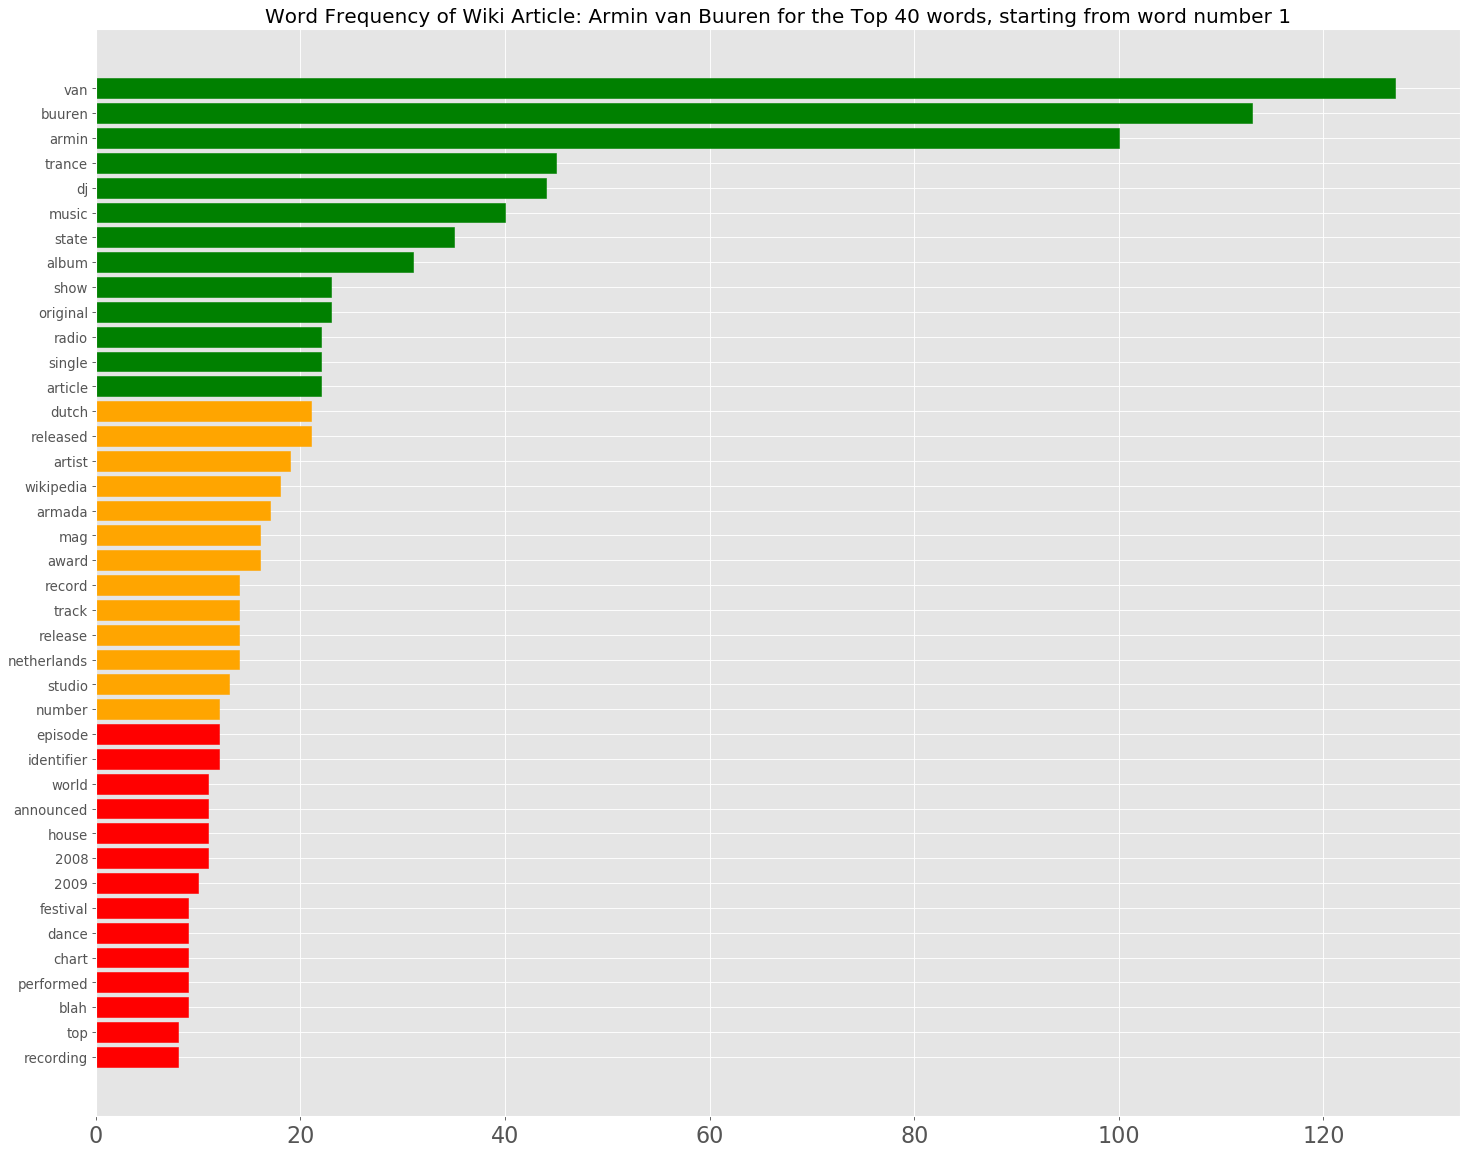

In [16]:
avb.plotwords('Armin_top40words_25112019', 40)

Graph is saved as Armin_top40words_25112019.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


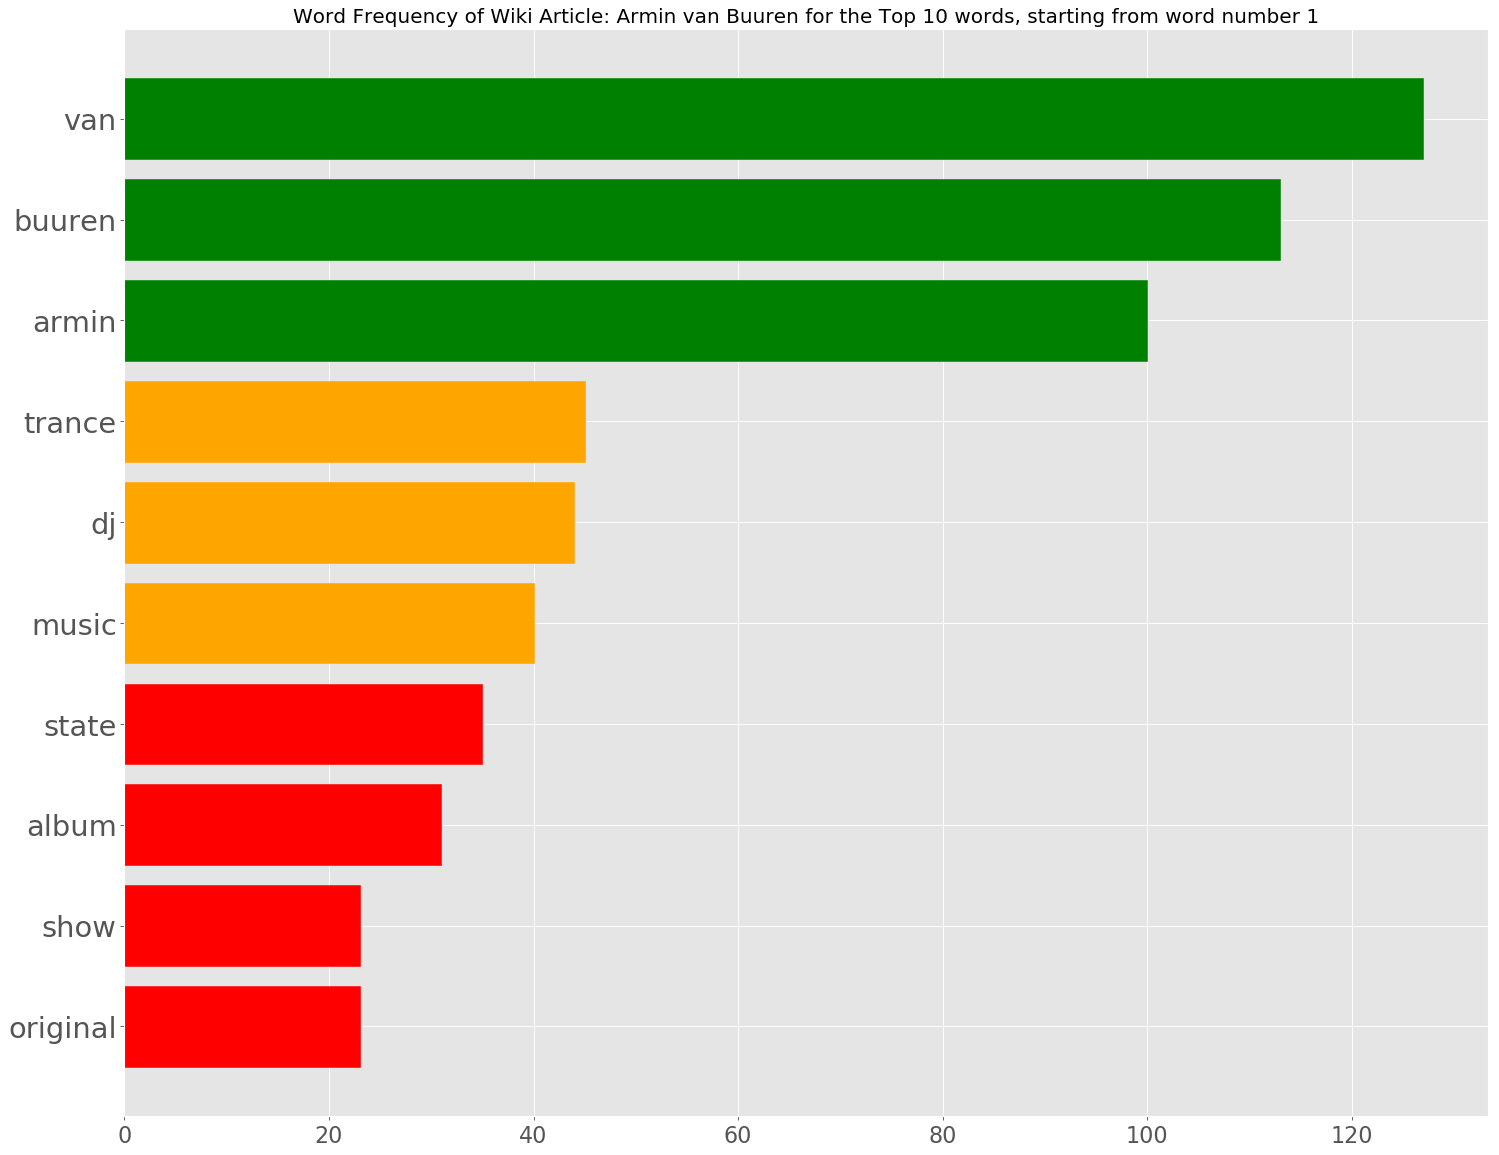

Graph is saved as Armin_top10words_25112019.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


In [17]:
avb.plotwords('Armin_top10words_25112019', 10)

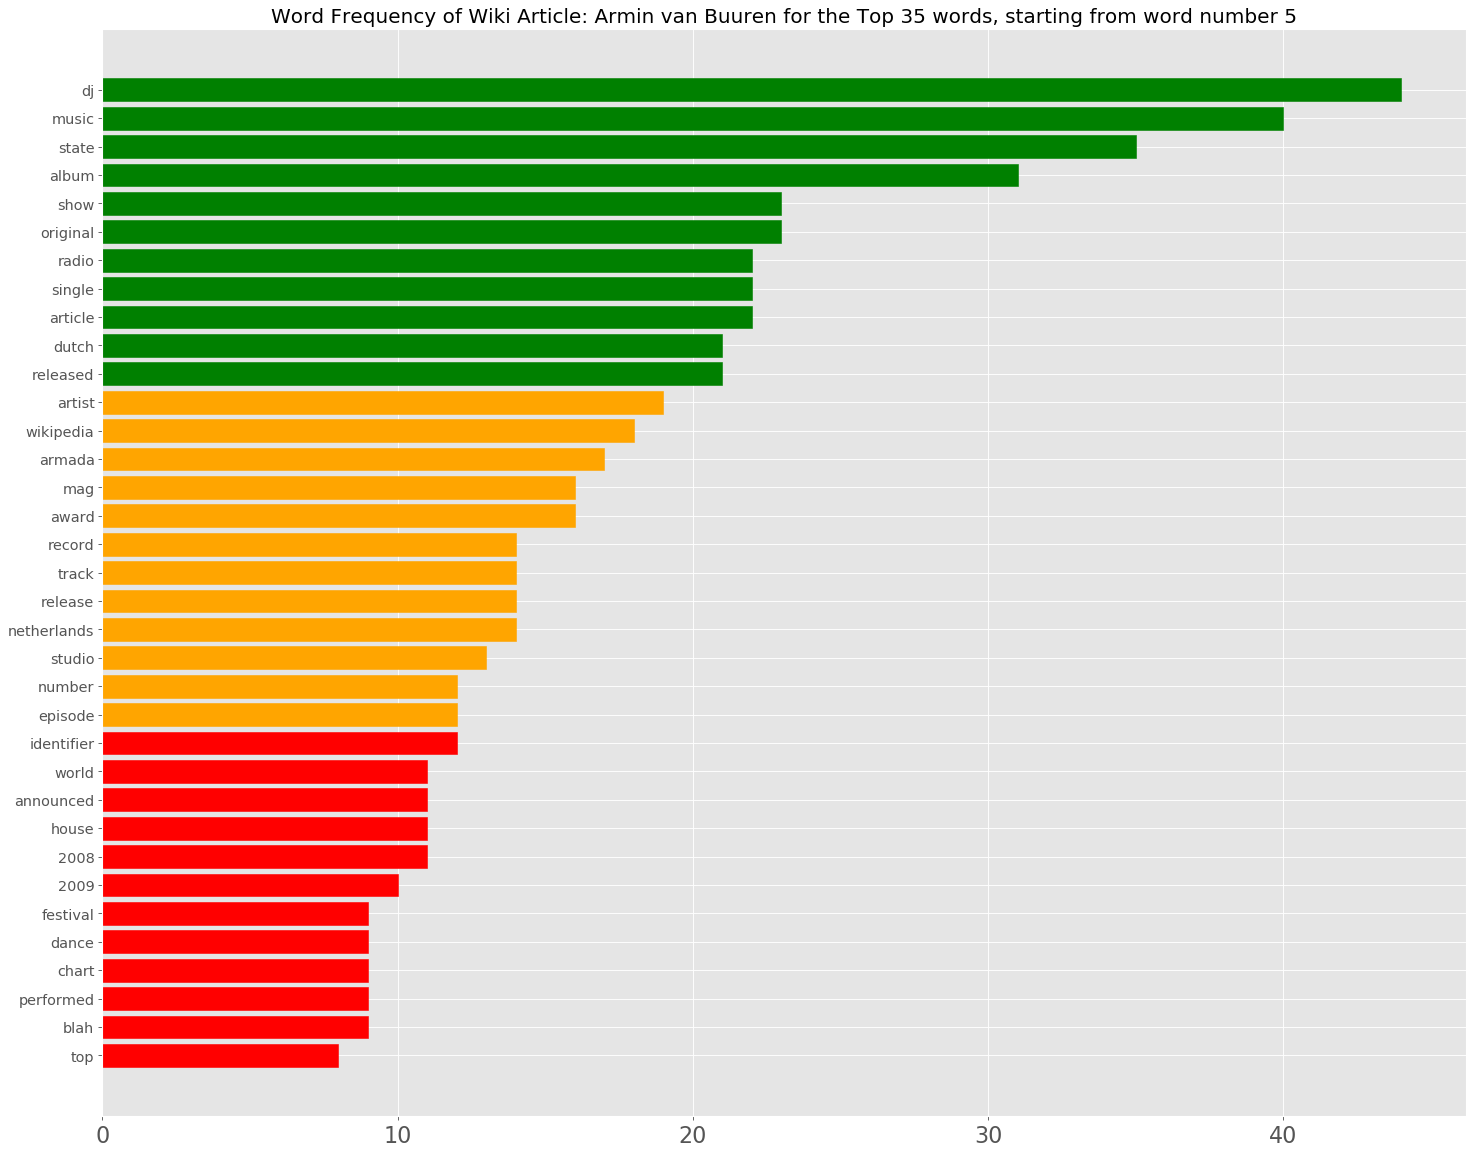

Graph is saved as ArminBuuren.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


In [18]:
avb.plotwords('ArminBuuren', 35, 5)

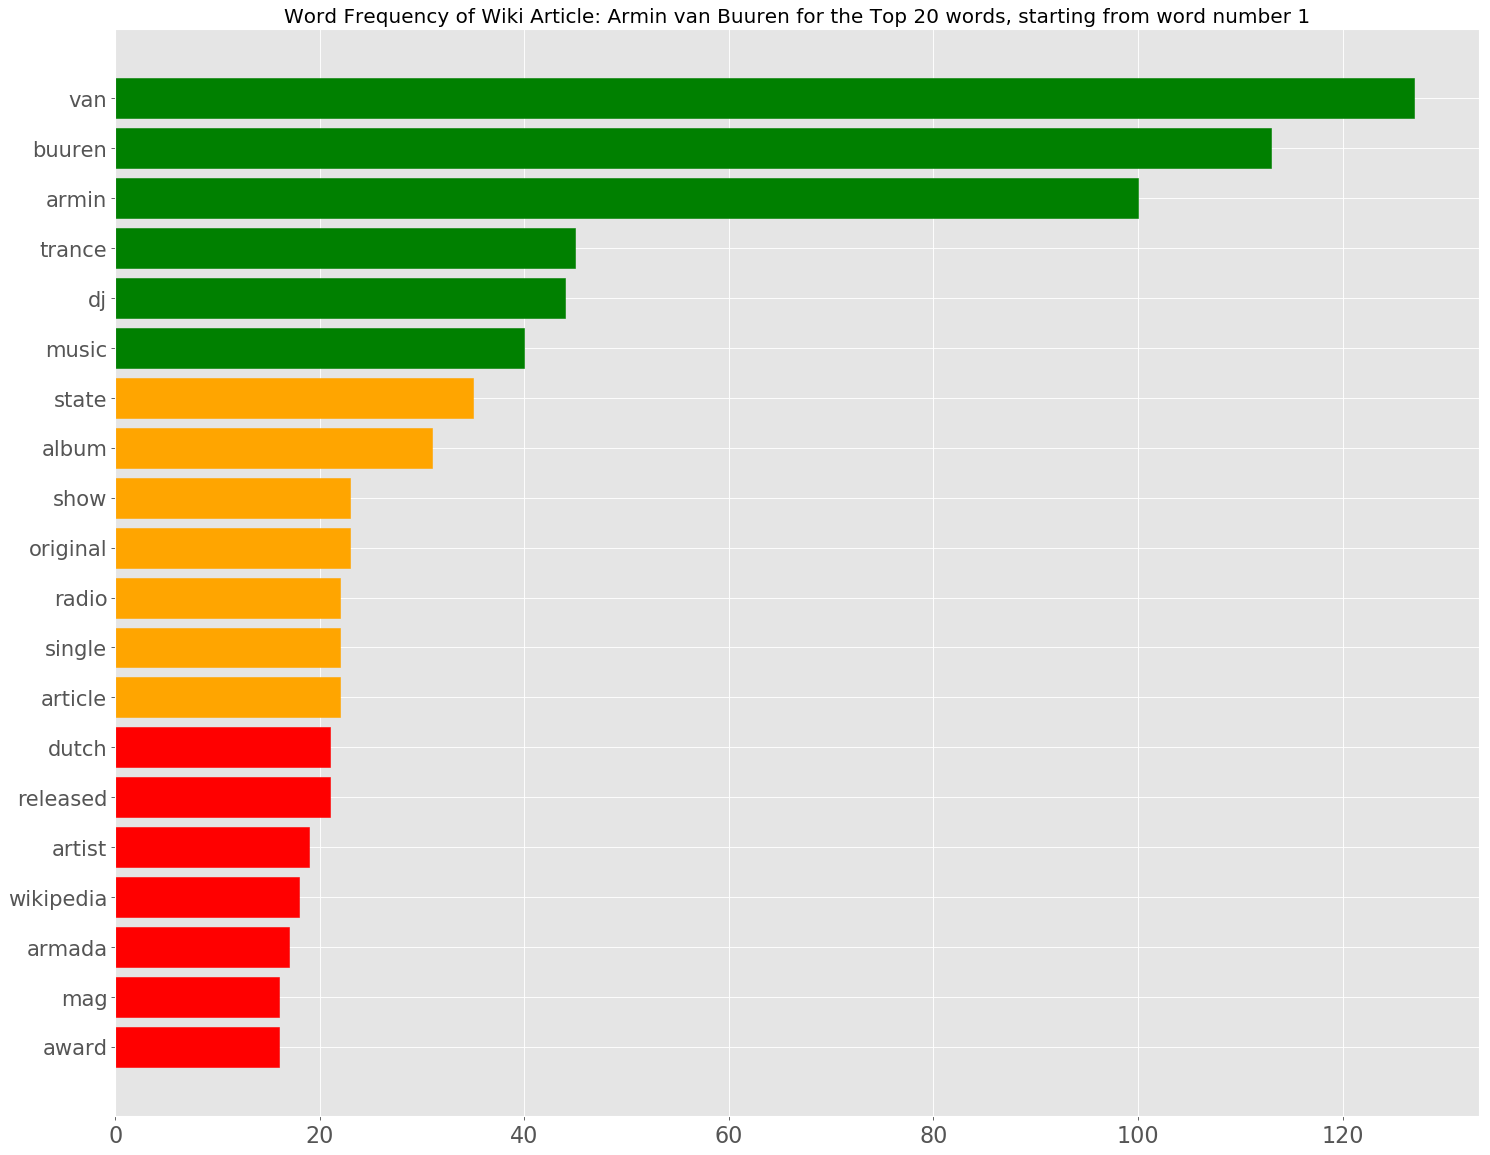

Graph is saved as wordcount.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


In [19]:
avb.plotwords(20)

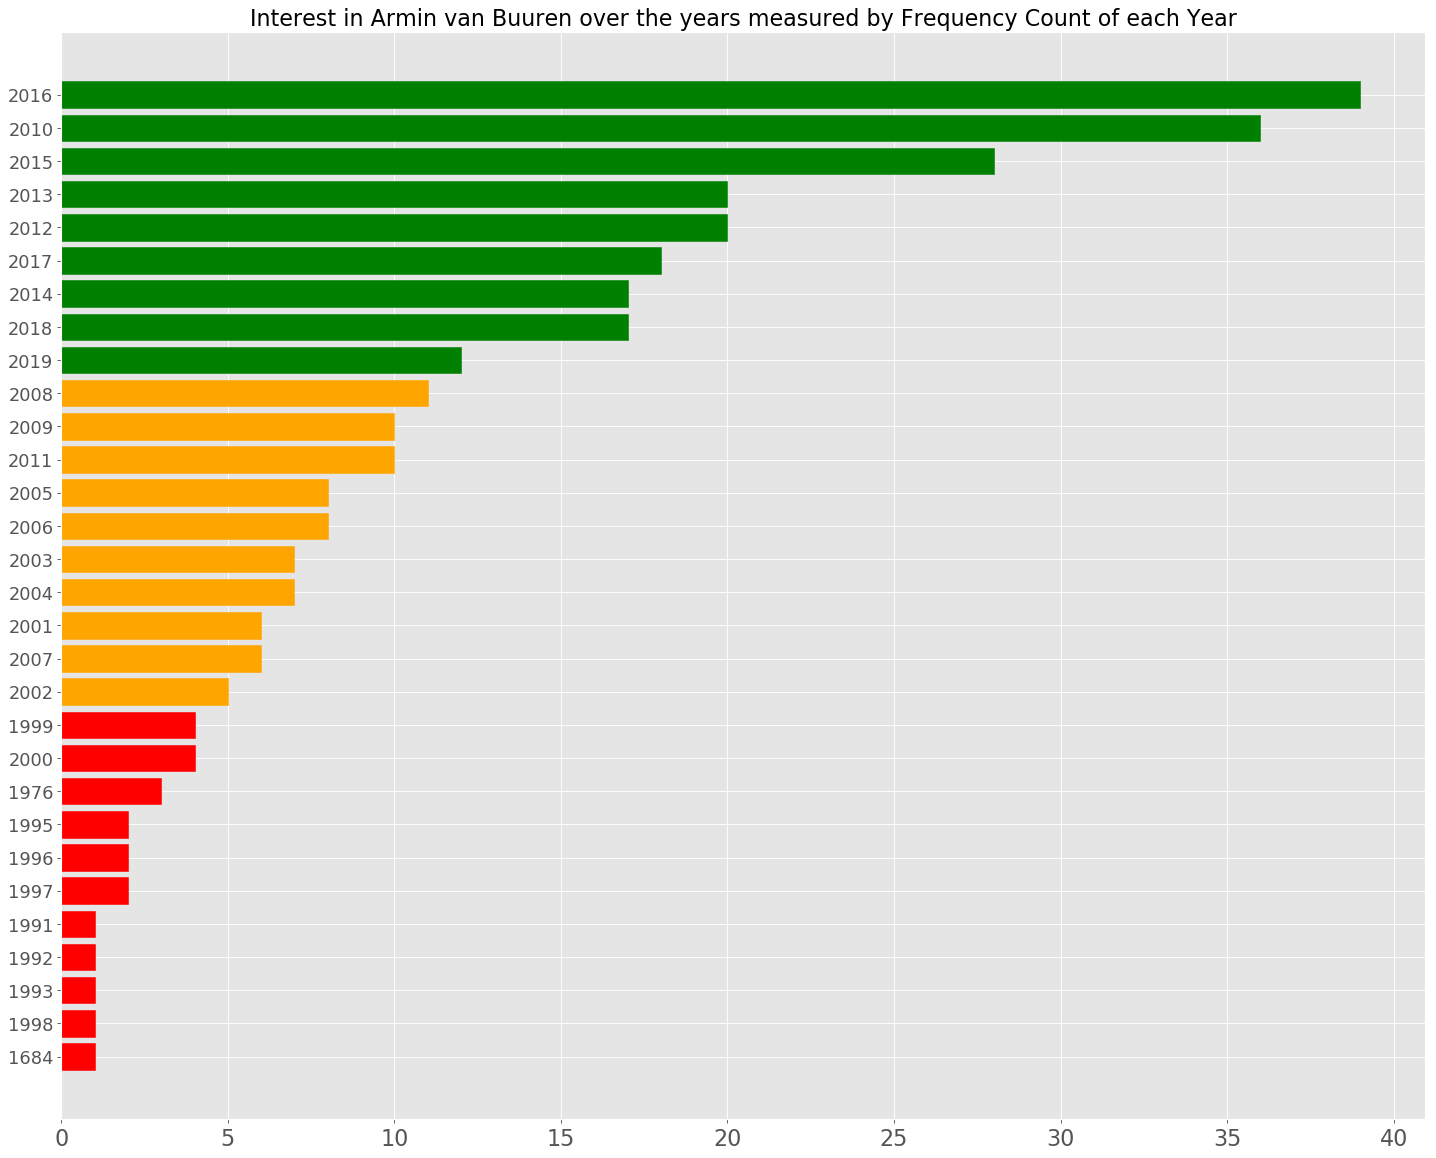

Graph is saved as Armin_top30years_25112019.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


In [20]:
avb.plotyear('Armin_top30years_25112019', 30)

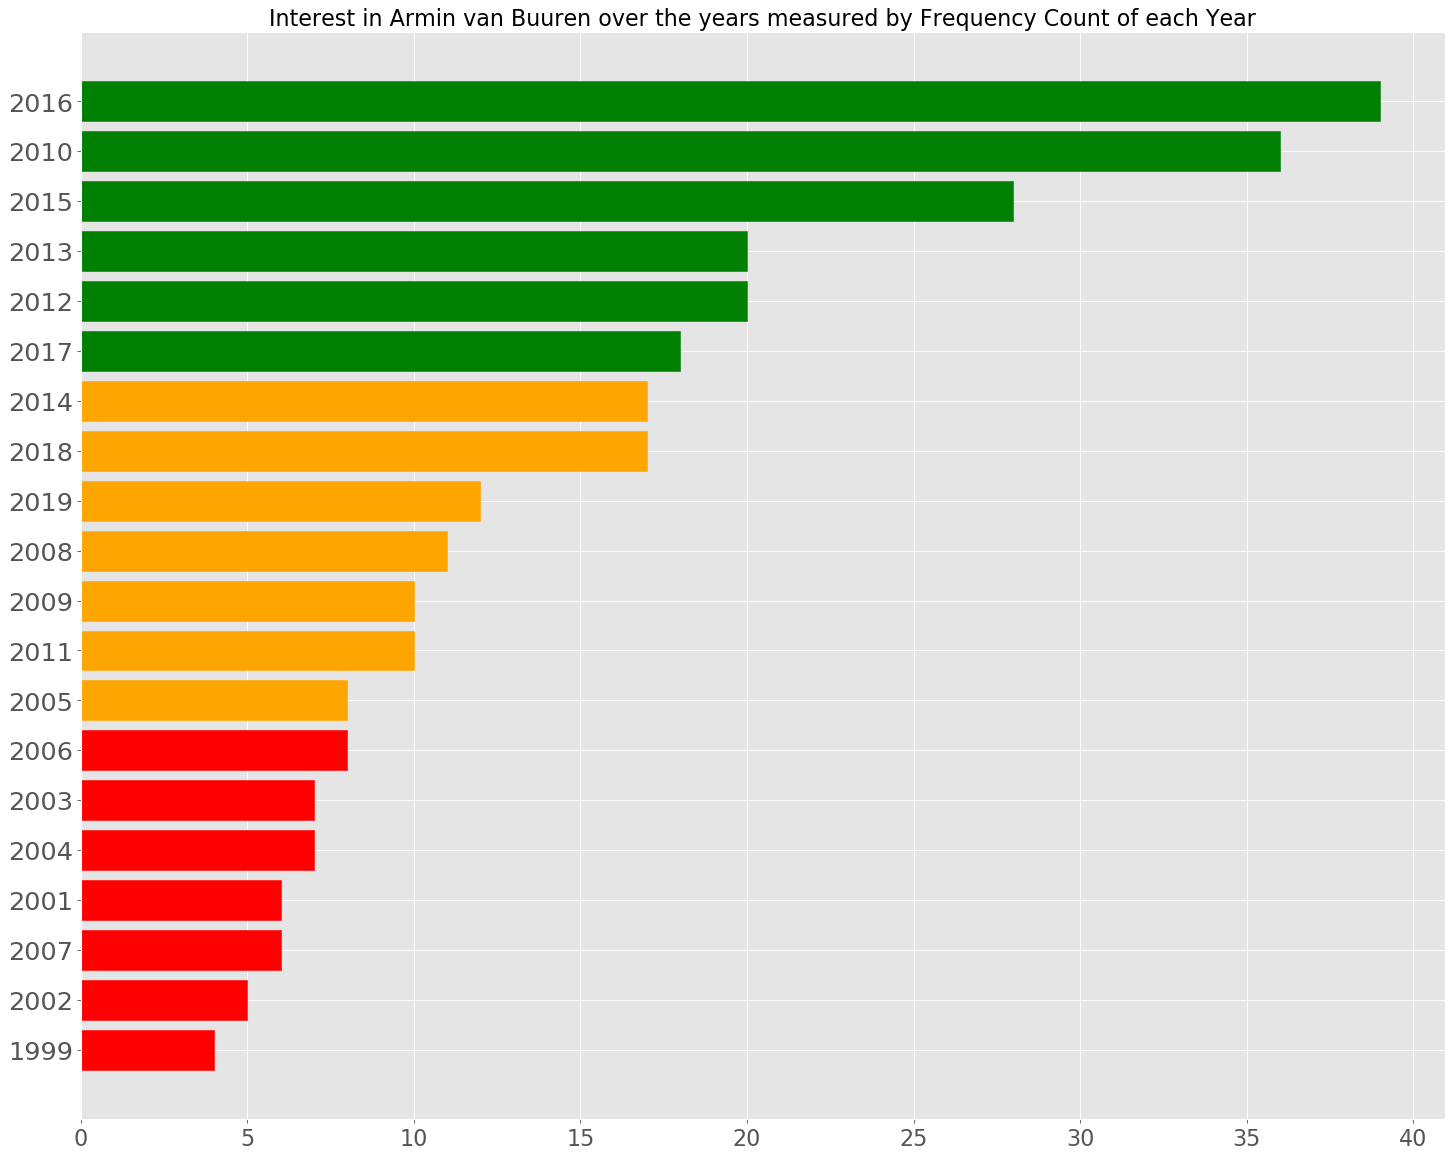

Graph is saved as yearcount.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


In [21]:
avb.plotyear(10)

In [22]:
djt = wiki('Donald Trump')

Page is loading...

Search text formatted to title/proper case by default. Set second argument as 'No' to disable formatting
Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Donald John Trump (born June 14, 1946) is the 45th and current president of the United States. Before entering politics, he was a businessman and television personality.
 

Trump was born and raised in the New York City borough of Queens and received a bachelor's degree in economics from the Wharton School at the University of Pennsylvania. He took charge of his family's real-estate business in 1971, renamed it The Trump Organization and expanded its operations from Queens and Brooklyn into Manhattan. The company built or renovated skyscrapers, hotels, casinos, and golf courses. Trump later started various side ventures mostly by licensing his name. He owned the Miss Universe and Miss USA beauty pageants from 1996 to 2015, and produced and hosted The Apprentice a reali

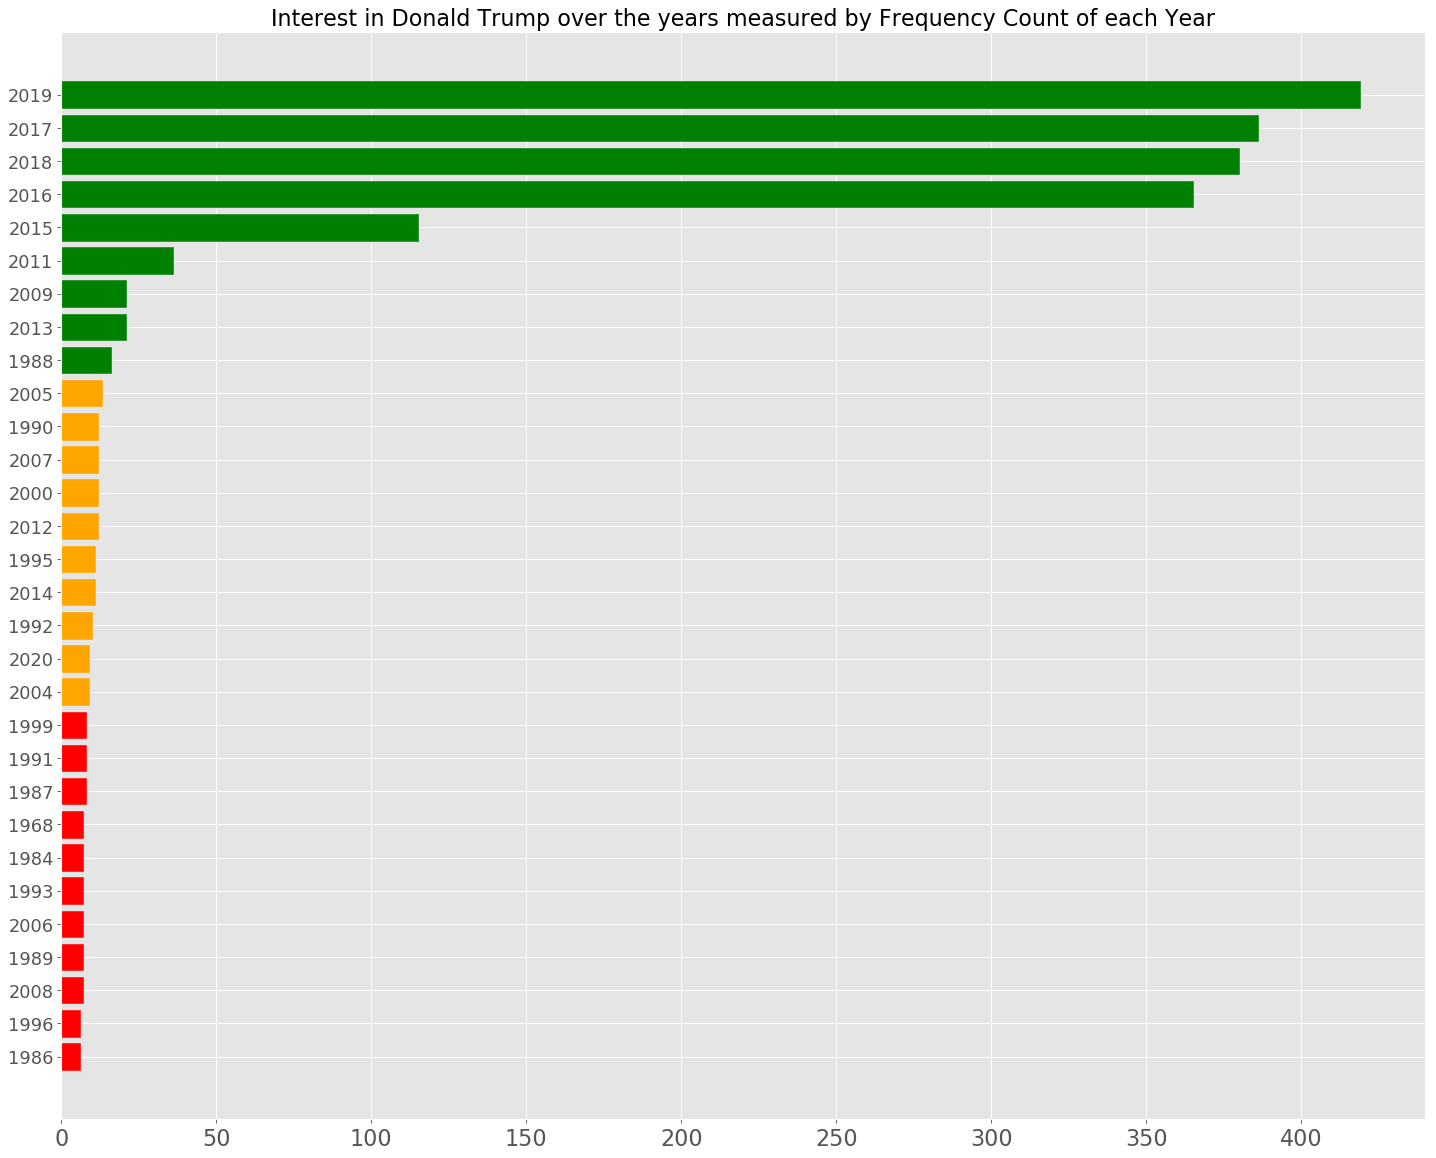

Graph is saved as Donald_Trump_30years.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


In [23]:
djt.plotyear('Donald_Trump_30years', 30)

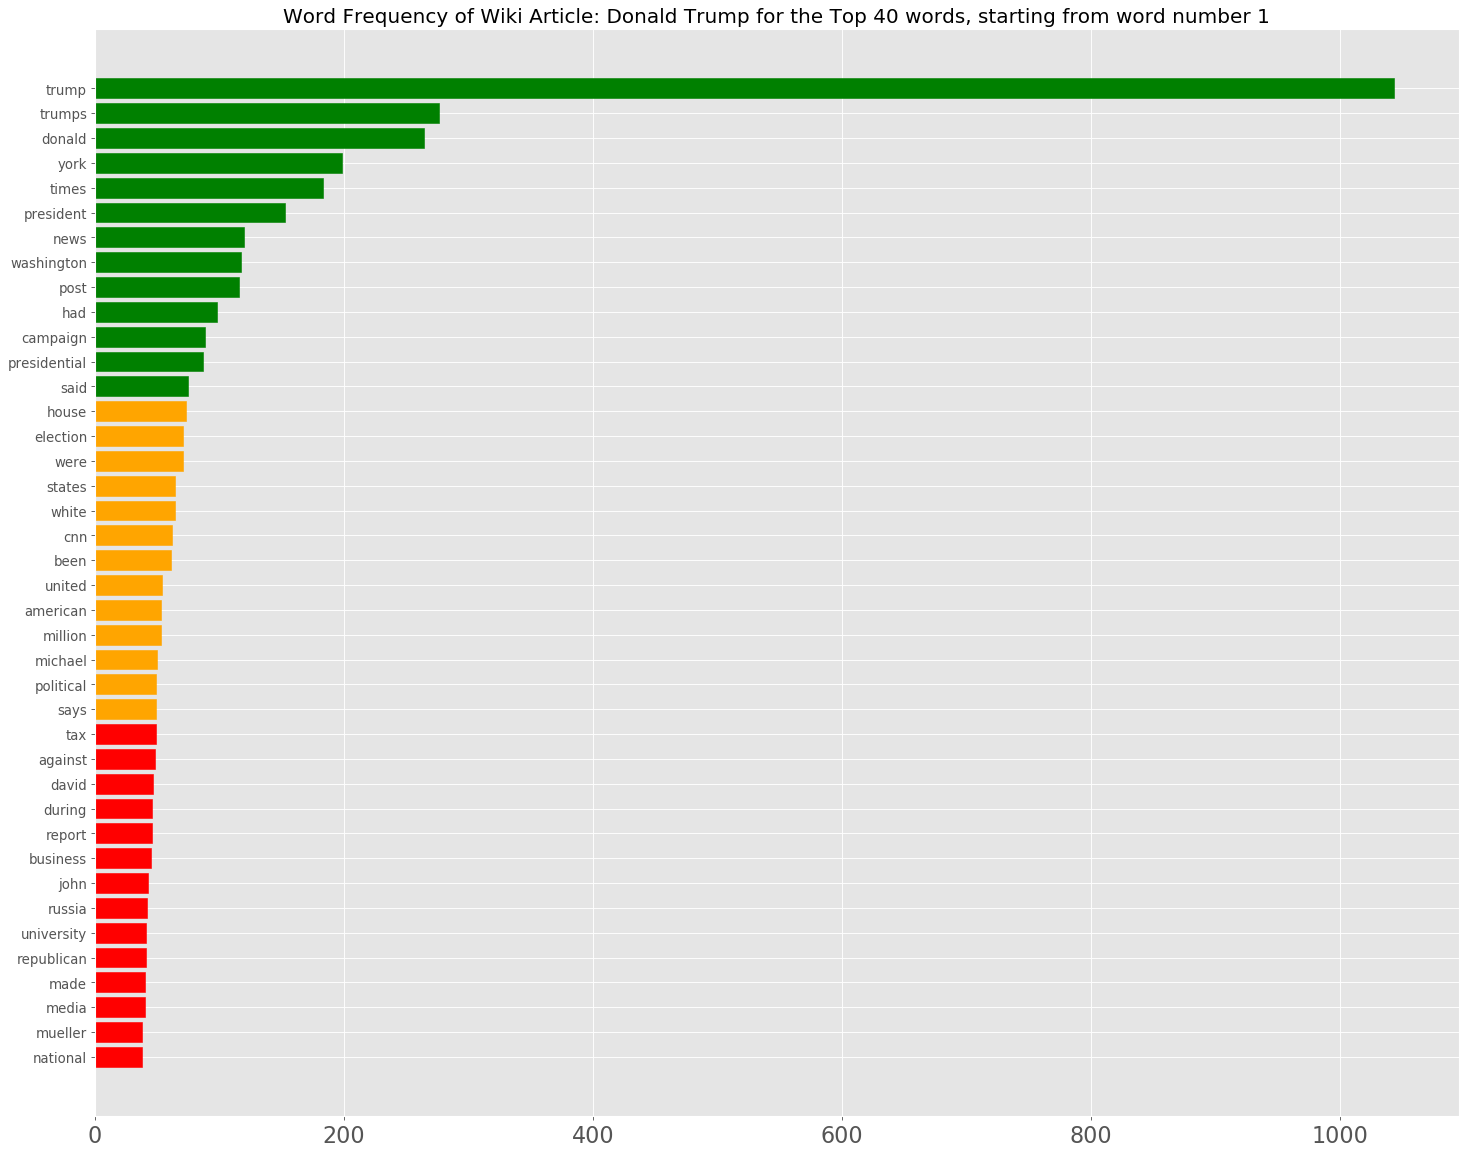

Graph is saved as Donald_Trump_40words.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


In [24]:
djt.plotwords('Donald_Trump_40words', 40)

In [25]:
djt.commonwords(40)

{'trump': 1043,
 '2019': 419,
 '2017': 386,
 '2018': 380,
 '2016': 365,
 'trumps': 276,
 'donald': 264,
 'york': 198,
 'times': 183,
 'president': 153,
 'news': 120,
 'washington': 117,
 'post': 116,
 '2015': 115,
 'had': 98,
 'campaign': 88,
 'presidential': 87,
 'said': 75,
 'house': 73,
 'election': 71,
 'were': 71,
 'states': 64,
 'white': 64,
 'cnn': 62,
 'been': 61,
 'united': 54,
 'american': 53,
 'million': 53,
 'michael': 50,
 'political': 49,
 'says': 49,
 'tax': 49,
 'against': 48,
 'david': 47,
 'during': 46,
 'report': 46,
 'business': 45,
 'john': 43,
 'russia': 42,
 'university': 41}

In [26]:
coldplay = wiki('Coldplay','yes','en','yes','yes')

Page is loading...

Search text formatted to title/proper case by default. Set second argument as 'No' to disable formatting
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
NLTK Stopword list for English will be used to remove common words

Wikipedia page loaded successfully!! Type variablename.HELP() for documentation of functions.


Coldplay are a British rock band formed in London in 1996. The band's singer/pianist Chris Martin guitarist Jonny Buckland bassist Guy Berryman and drummer Will Champion met at University College London and came together from 1996 to 1998. During these two years, the band changed names from Pectoralz to Starfish and, finally, to Coldplay. Creative director and former manager Phil Harvey is often re

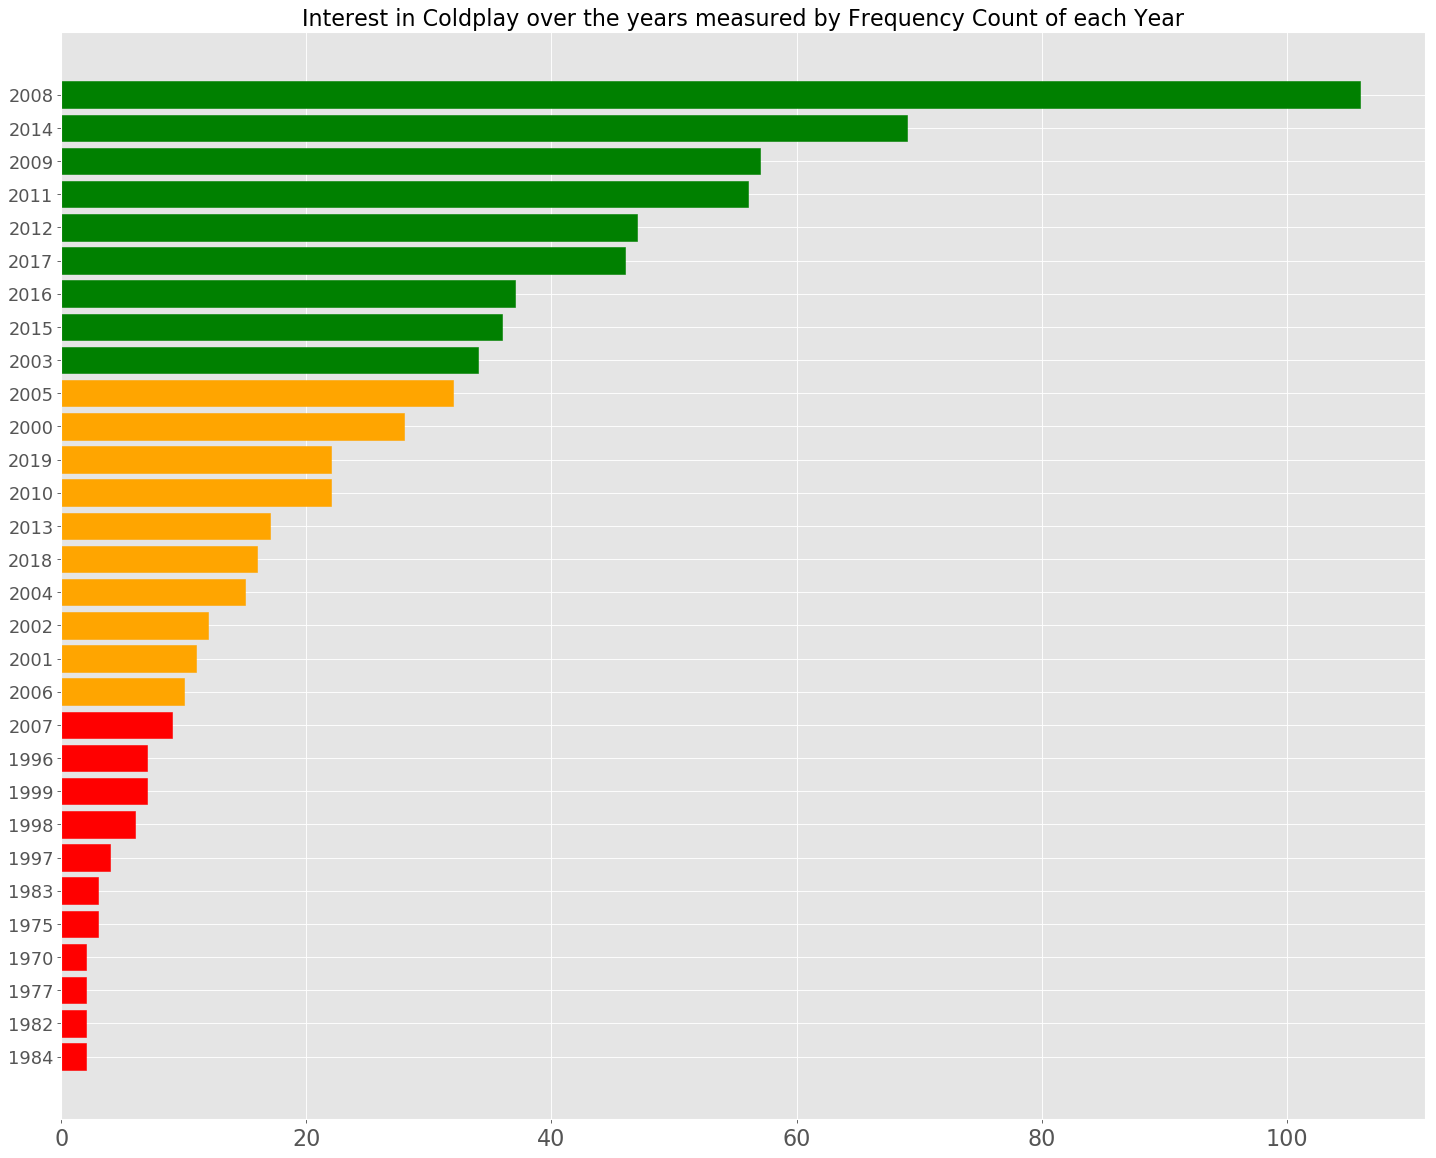

Graph is saved as ColdplayYearCount3.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


In [27]:
coldplay.plotyear('ColdplayYearCount3', 30)

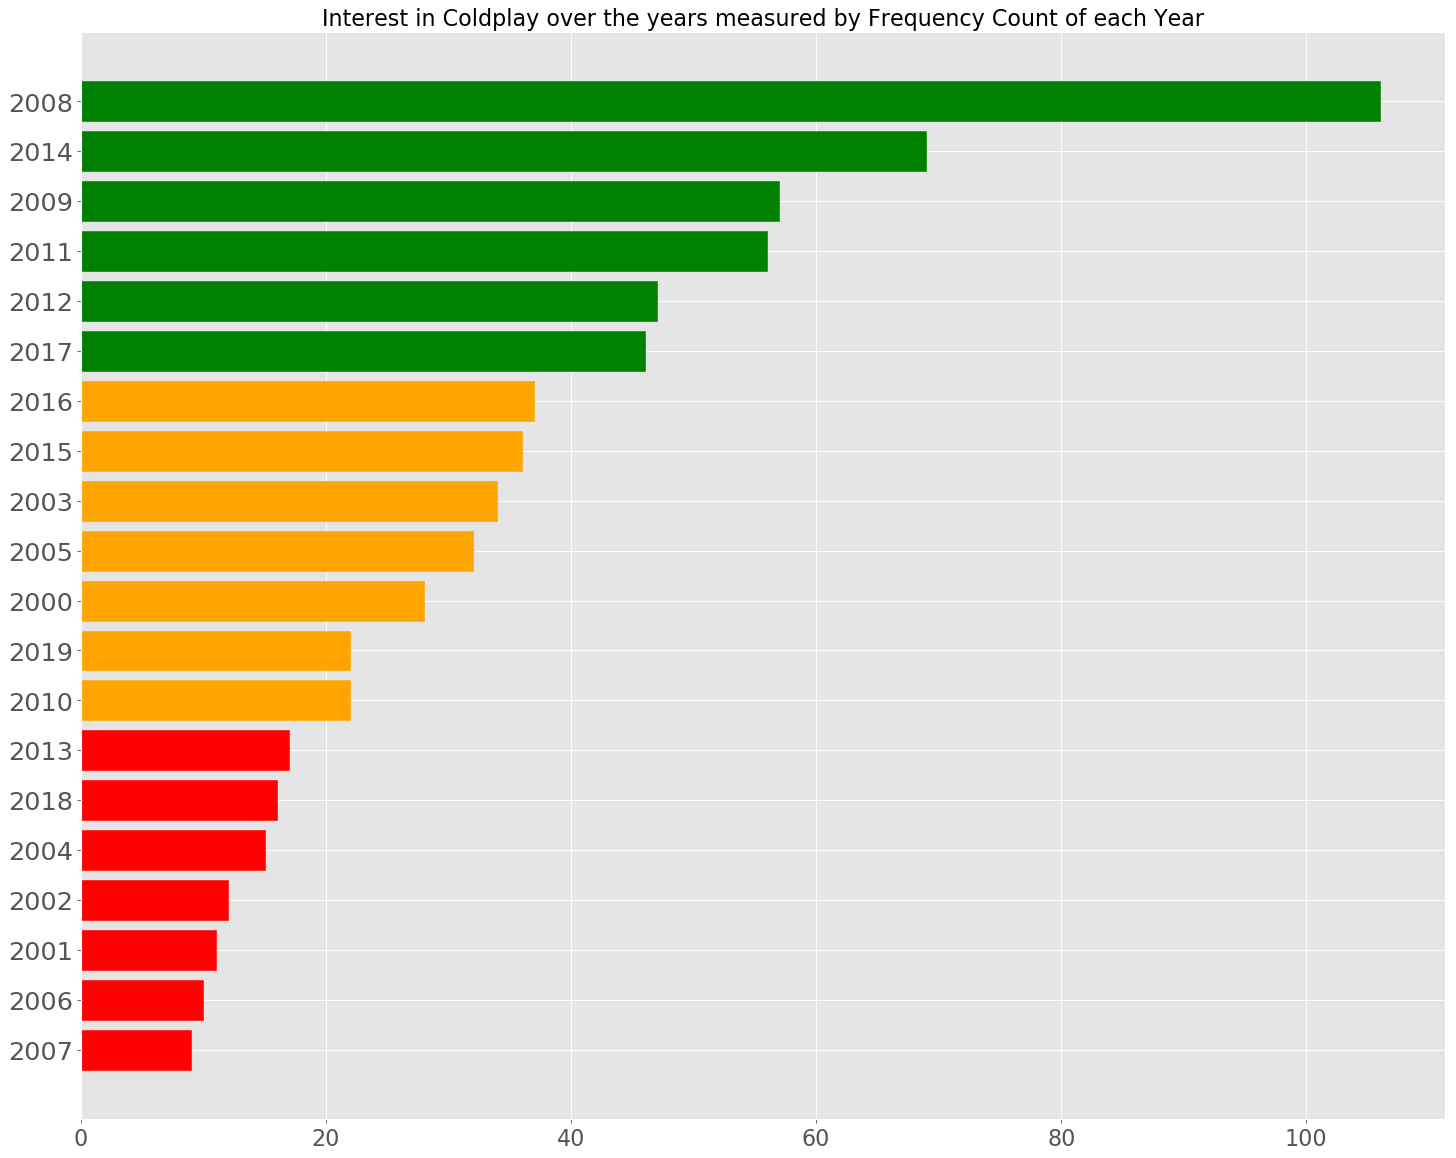

Graph is saved as ColdplayWordCount2.png in directory: C:\Users\jx\Desktop\Python Tutorial\TUTORIALS BASICS OF PYTHON\Wikipedia Scraper


In [28]:
coldplay.plotyear('ColdplayWordCount2', 20)

In [29]:
coldplay.totalwords()

Total word count is 13868
Total word count is 7697 after implementing banlist

Unique word count is 2692 for the Wikipedia site titled Coldplay
Unique word count AFTER BANLIST is 2496 for the Wikipedia site titled Coldplay


[13868, 7697, 2692, 2496]

In [30]:
coldplay.commonwordspct(20)

20% threshold means the most common words shown/output below appeared equal to or less than 1539 times out of 7697 total word count.

For the word count threshold, the 94 most common words are shown/output.




{'coldplay': 245,
 'album': 150,
 '2008': 106,
 'band': 105,
 'award': 73,
 '2014': 69,
 'tour': 64,
 'martin': 59,
 'released': 59,
 'song': 57,
 '2009': 57,
 '2011': 56,
 'bbc': 51,
 'music': 49,
 'original': 48,
 '2012': 47,
 '2017': 46,
 'single': 45,
 'la': 42,
 'viva': 39,
 'uk': 39,
 'vida': 38,
 '2016': 37,
 '2015': 36,
 'live': 35,
 'rock': 34,
 'chris': 34,
 '2003': 34,
 'news': 33,
 'head': 32,
 '2005': 32,
 'concert': 30,
 '2000': 28,
 'chart': 28,
 'group': 27,
 'coldplays': 27,
 'best': 27,
 'london': 26,
 'grammy': 26,
 'artist': 26,
 'full': 25,
 'festival': 25,
 'billboard': 25,
 'mtv': 24,
 'u': 24,
 'release': 23,
 'mylo': 23,
 'world': 23,
 'studio': 22,
 'xyloto': 22,
 'dream': 22,
 '2019': 22,
 'video': 22,
 'ep': 22,
 'number': 22,
 '2010': 22,
 'parachute': 21,
 'british': 20,
 'record': 20,
 'story': 20,
 'love': 20,
 '&amp': 20,
 'top': 19,
 'global': 19,
 'including': 18,
 'review': 18,
 'ghost': 18,
 'performed': 18,
 'article': 18,
 '2013': 17,
 'wikipedia'